In [1]:
# Importing Packages
import matplotlib.pyplot as plt
import random
import seaborn as sns

import pandas as pd
from itertools import cycle, islice
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

import statistics 
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


In [2]:
# business inputs
base_volume_ini = 300           # prodection rate of the first half-year (unit: thousand gallon / 6-month)
base_volume_normal = 600        # regular prodection rate of a half-year (unit: thousand gallon / 6-month)
base_sales_price = 10.18        # sales price per gallon
base_unit_cost = 5.96           # production cost per gallon
base_discount = 6               # percent  (%)

capital = 1.4  # capital investment (Million USD)
dev_cost = 5.0  # development cost (Million USD)

# Simulation inputs
simulation_number = 5000
start_date = datetime.datetime.strptime("1-1-2022", "%m-%d-%Y")
end_date = datetime.datetime.strptime("1-1-2026", "%m-%d-%Y")





### Calculate NPV for each simulation case

In [3]:
simulation_result = pd.DataFrame({'forecast_date':pd.date_range(start_date, end_date, freq='M')})
simulation_step = simulation_result.shape[0]

sim_case = 0

while sim_case <= simulation_number:
    
    sim_case += 1
    # compute resut in thousand-dollar unit
    track_in = np.zeros(simulation_step)  # track monthly income
    track_npv = np.zeros(simulation_step) - (capital + dev_cost) * 1000  # track monthly NPV (net profit V-something)  
    
    for i in range(0, simulation_step):
        if i <= 6:
            track_in[i] = round( base_volume_ini/6 * round(random.uniform(0.95, 1.05), 3) * \
                        ( base_sales_price * round(random.uniform(0.95, 1.05), 3) * (1 - base_discount/100) * round(random.uniform(0.95, 1.05), 3)  - \
                         base_unit_cost * round(random.uniform(0.95, 1.05), 3) ) , 3)
        else:
            track_in[i] = round( base_volume_normal/6 * round(random.uniform(0.95, 1.05), 3) * \
                        ( base_sales_price * round(random.uniform(0.95, 1.05), 3) * (1 - base_discount/100) * round(random.uniform(0.95, 1.05), 3)  - \
                         base_unit_cost * round(random.uniform(0.95, 1.05), 3) ) , 3)

        track_npv[i] = track_npv[i] + sum(track_in[0 : i+1])

    simulation_result['sim_'+str(sim_case)] = track_npv.tolist()



### Plot NPV result

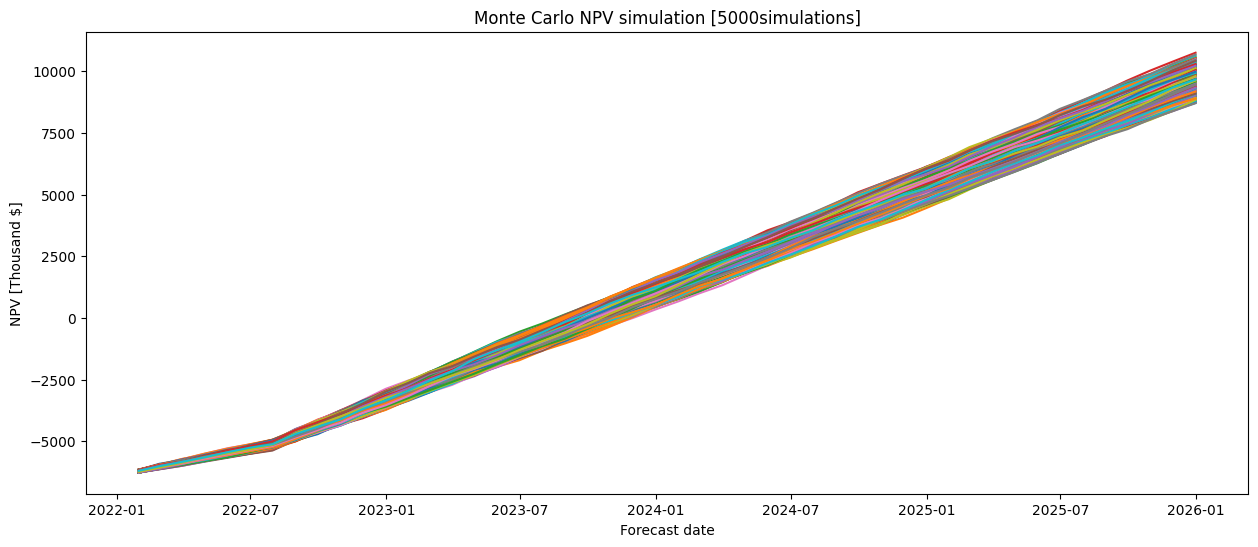

In [4]:
# Creating Figure for Simulation Balances
fig = plt.figure(figsize=(15,6))
plt.title("Monte Carlo NPV simulation [" + str(simulation_number) + "simulations]")
plt.xlabel("Forecast date")
plt.ylabel("NPV [Thousand $]")

for i in range(0, simulation_number):
    plt.plot(simulation_result['forecast_date'], simulation_result['sim_' + str(i+1)])


### Plot final NPV probability distribution

Text(0, 0.5, 'Density')

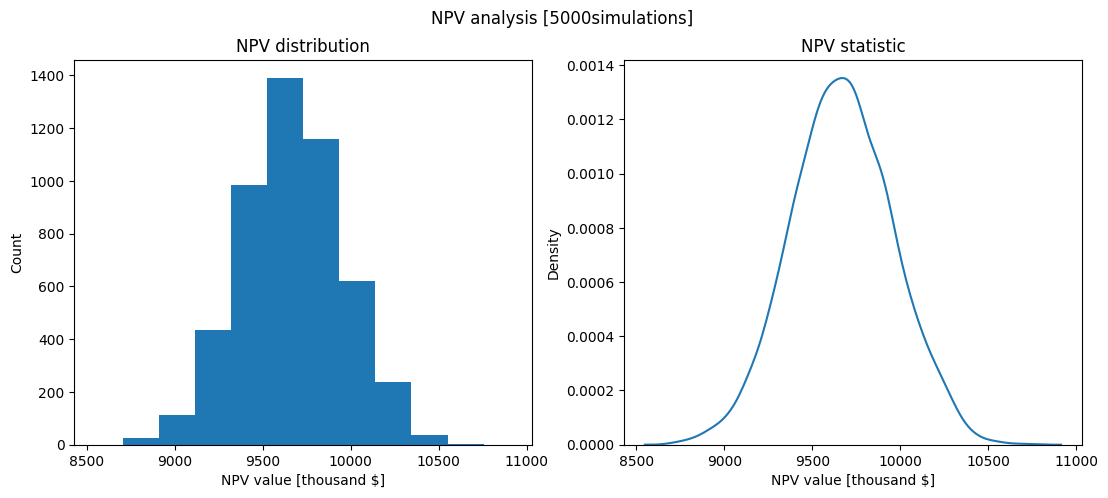

In [5]:
# Creating Figure for Simulation Balances

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
fig.suptitle("NPV analysis [" + str(simulation_number) + "simulations]")

# Histogram (raw plot)
axes[0].set_title('NPV distribution')
axes[0].hist(simulation_result.loc[simulation_step-1][1:-1])
axes[0].set_xlabel("NPV value [thousand $]")
axes[0].set_ylabel("Count")

sns.kdeplot(simulation_result.loc[simulation_step-1][1:-1], ax=axes[1])
axes[1].set_title('NPV statistic')
axes[1].set_xlabel("NPV value [thousand $]")
axes[1].set_ylabel("Density")


<Axes: xlabel='47', ylabel='Density'>

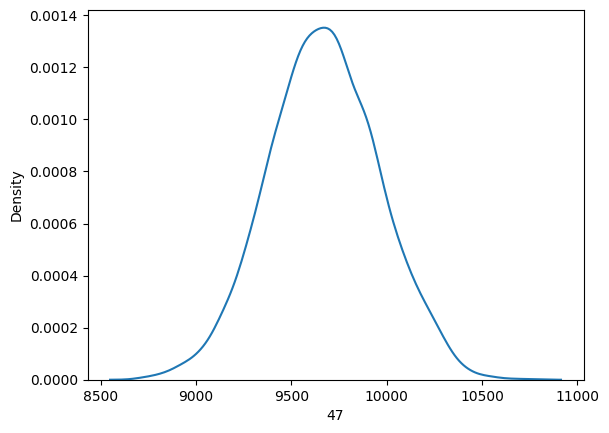

In [6]:
sns.kdeplot(simulation_result.loc[simulation_step-1][1:-1])

# Conclusion

In [7]:
print("Standard Deviation of the sample is % s thousand dollar "% round((statistics.stdev(simulation_result.loc[simulation_step-1][1:-1])), 3))
print("Mean of the sample is % s thousand dollar " % round((statistics.mean(simulation_result.loc[simulation_step-1][1:-1])), 3)) 

Standard Deviation of the sample is 291.109 thousand dollar 
Mean of the sample is 9669.483 thousand dollar 


In [8]:
mean_profit, low_profit, high_profit = mean_confidence_interval(simulation_result.loc[simulation_step-1][1:-1], confidence=0.95)

print("Targeting 0.95%% of confidence rate, we aim target net profit of %s thousand dollar "% round(low_profit,1))

Targeting 0.95% of confidence rate, we aim target net profit of 9661.4 thousand dollar 
